# 2.155/6 Challenge Problem 2
<font size="1">
  Demo created by L. Regenwetter in Oct. 2023;   Artwork by Jessica Shung. </font>

In [1]:
from utils_public import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

c:\Users\layal\anaconda3\envs\cp2env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Overview
In this challenge problem, you've been hired as an urban planner for an urban development project in budding city. The city is rapidly expanding and has a large area that they are looking to zone. The mayor has asked you to consult with several of their advisors to figure out an optimal zoning strategy. These advisors are an interesting bunch. Though they mean well, but they are somewhat biased towards their own areas of expertise. Pleasing all of them will be tricky!

## Let's meet the advisors:
**The Wellness Advisor:** With a background in the parks & rec department of the city government, the wellness advisor is focused on the health and wellbeing (both physical and mental) of citizens. Among other things, they are very invested in the quality and accessibility of city's green spaces.

**The Tax Advisor:** With a background in the revenue department of the city government, the tax advisor is focused on balancing city expenditures with income and keeping the city's economy afloat. Among other things, they are invested in maximizing property value and reducing city expenditures.  

**The Transportation Advisor**: As a former executive in the local public transportation authority, the transportation advisor places an emphasis on accessibility and emissions. Among other objectives, they are focused on mimizing the distance over which the workforce needs to commute.

**The Business advisor:** As a professor emeritus of economics at the state college in the city, the economic advisor is fixated on the general economic prosperity of the city's businesses and inhabitants. Among other things, they prioritize the overall economic output of the city.

## Understanding City Zoning:
Cities are often comprised of districts. Typically, the city government zones areas allowing them some amount of control over what goes on in each distict. To simplify, we will be represing city districts as discrete spaces in a 7x7 grid. Each grid space will be filled with exactly one of five types of zones. We will discuss the districts below:

**Residential Zones [0]:** Residential zones are comprised primarily of housing and are where the workforce lives

**Industrial Zones [1]:** Industrial zones are the manufacturing centers of the city, packed with factories producing food and goods.

**Commercial Zones [2]:** Commercial zones are the retail hubs of the city, consisting of markets, stores, and restaurants.

**Park Zones [3]:** City parks are the green spaces of the city -- small tastes of nature within an urban environment.

**Office Zones [4]:** Office zones are the enterprise centers of global corporations and local businesses alike.

In [ ]:
plot_districts()

## The Data
The mayor has provided you access to a large dataset of 500,000 possible zoning configurations. Additionally, the mayor asked the advisors to score some of these zoning configurations according to their subjective opinions of efficacy. Since the advisors are "only human" they have only been able to label ~5,000 configurations each. Some of their assessments may seem questionable to you, but they mayor insists that the advisors are "experts" and their ratings should not be questioned.

Let's take a look at the data. First, lets have a look at the zoning layouts you are given.

In [ ]:
grids = load_grids() #Helper function we have provided to load the grids from the dataset
grids.shape #Check shape

Let's examine the first grid in the dataset. It consists of 7x7 entries, each ranging from 0 to 4. The entries denote the district occupying the grid space (labeled above).

In [ ]:
grids[0]

Let's visualize some of these grids. We have provided some utilities, mainly fucused on visualization, which we imported at the top of the notebook.

In [ ]:
plot_n_grids(grids[:10]) #Plotting function that plots some number of grids in a clean layout

Now lets have a look at the advisor scores:

In [ ]:
ratings = np.load("datasets/scores.npy") #Load advisor scores
score_order = ["Wellness", "Tax", "Transportation", "Business"] #This is the order of the scores in the dataset
ratings_df = pd.DataFrame(ratings, columns = score_order) #Create a dataframe
display(ratings_df) #Print dataframe

We can see that the vast majority of ratings are NaN. After all, only 1% of the data is labeled. Let's confirm that there are the right number of NaNs in each column:

In [ ]:
ratings_df.isna().sum()

Let's plot the distribution over the scores that are rated. We see that each advisor's scores are fairly uniform from 0 to 1.

In [ ]:
plot_ratings_histogram(ratings)

## The Task:
**Satisfying the Advisors:**
You are tasked with finding zoning layouts that "satisfy" all four advisors, meaning that they each assign a score of at least 0.85. If even one of the advisors rates a layout under a 0.85, it will be rejected as a candidate. You much identify designs from the dataset or generate new designs that *you believe* will be accepted by the advisors.

**Identifying a diverse set:** The mayor has asked for a variety of "diverse" design candidates -- 100 city layouts to be exact -- which they will show to the advisors. The overall diversity of all valid (non-rejected) designs will be calculated. With this diversity metric, more designs is always better, so it is in your best interest to ensure that as few of your submitted designs are rejected as possible.

We have provided the function we will use to evaluate diversity. Here are a few tests to build some intuition with the diversity score.

### Building Intuition for Diversity

In [ ]:
diversity_score(grids[:100]) #Diversity of the first 100 grids in the dataset

In [ ]:
#If we set the top left corner to 0 in all grids, the diversity score should go down
g_1 = grids.copy()
g_1[:,0,0] = 0
diversity_score(g_1[:100])

In [ ]:
#If some grids are the same, the diversity score should go down
g_2 = grids.copy()
g_2[0] = g_2[1]
diversity_score(g_2[:100])

In [ ]:
#If we submit fewer grids, the diversity score should go down (as will occur if invalid designs are submitted)
diversity_score(g_2[:99]) #Diversity of the first 99 grids in the dataset

In [ ]:
# A diverse set of five grids where no two cities have the same type of district in the same grid space
diverse_set = np.random.rand(5,7,7).argsort(0)
plot_n_grids(diverse_set)
print(f"Diversity Score: {diversity_score(diverse_set, 5)}")


In [ ]:
#set of 5 grids where each district is independent and random with 20% probability for each district
random_set = np.random.randint(0,5, size=(5,7,7))
plot_n_grids(random_set)
print(f"Diversity Score: {diversity_score(random_set, 5)}")

In [ ]:
#Set of five grids where each grid space only takes one of two types across all cities
r1 = np.random.randint(0,5,size=(7,7))
r2 = np.random.randint(0,5,size=(7,7))
mask = np.random.randint(0,2,size=(5,7,7))
non_diverse_set = r1 * mask + r2 * (1-mask)
plot_n_grids(non_diverse_set)
print(f"Diversity Score: {diversity_score(non_diverse_set, 5)}")

Assuming that all designs in your submitted sets are valid, you will be able to *exactly calculate* the diversity of your submitted sets.

# Your Code

Time to get coding! We recommend you start by training some regressors to predict the advisor scores. From there, it's up to you to generate or select city designs that you think will satisfy the requirements!



### Hints:
1. The advisors pay a lot of attention to the **adjacency** of districts as well as the **distances** from certain types of districts to others.
2. This is a grid-structured city. What **distance metric** is appropriate?
3. Though adding **novel** varied designs to your final set will increase the diversity score most, **duplicates** of valid designs will still slightly increase the diversity score, whereas invalid designs will not (see utils function for exact calculation).



### Training Regressors
We have provided code to train a simple AutoML regressor from AutoGluon that predicts advisor scores.


First, lets install autogluon:

We provided a small helper function that grabs the labeled subset of the dataset for some advisor:

In [ ]:
grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,0]) #gets subset of the dataset rated by advisor 0
print(grids_subset.shape)
print(ratings_subset.shape)

We will be using Autogluon Tabular, which requires flattened (tabular) data. Let's reshape our grids:

In [ ]:
grids_subset = grids_subset.reshape(grids_subset.shape[0], 49) #Flatten our nx7x7 set of grids into nx49 set of vectors

Autogluon is time-consuming so we aren't going to bother with k-fold here. We do a simple train-test split to save time. Autogluon expects a single dataframe with both the "x" and "y" values and asks the user to specify the name of the column to predict. Therefore, we set up a dataframe with the predictions and the flattened feature vectors side by side:

In [ ]:
grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)

#Convert to dataframe and specify dtype of object to ensure categorical handling of data
grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object")
grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")

#Convert ratings to dataframe and label the column so we can tell Autogluon what to predict
preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])

#Concatenate train grids and ratings together
all_train = pd.concat([grids_train, preds_train], axis=1)
display(all_train) #Have a look to check things over

We finally train the model! (Please don't waste too much time fiddling with Autogluon parameters -- the whole point of AutoML is to avoid this!)

In [ ]:
predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {'NN_TORCH':{}, 'GBM':{}, 'RF':{}, 'XT':{}, 'KNN':{}})

In [ ]:
from sklearn.metrics import r2_score

preds_test = predictor.predict(grids_test)
preds_train = predictor.predict(grids_train)

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i):
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#F08E18") #Train set in orange
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #Test set in magenta
    plt.plot([0,1], [0,1], label="target", linewidth=3, c="k") # Target line in Black
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {i} Predictions")
    plt.legend()
    plt.show()
    print(f"Train Set R2 score: {r2_score(ratings_train, preds_train)}") #Calculate R2 score
    print(f"Test Set R2 score: {r2_score(ratings_test, preds_test)}")
plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, 0)

A little function to get all the predictions for the dataset, but overwrite the prediction for the datapoints where the ground truth value is known.

In [ ]:
def get_predictions(grids, ratings, predictor):
    grids = grids.reshape(grids.shape[0], 49)
    grids_df = pd.DataFrame(grids, columns = range(grids.shape[1]))
    predictions = predictor.predict(grids_df).values
    mask = np.where(~np.isnan(ratings))
    predictions[mask] = ratings[mask]
    return predictions
predictions = get_predictions(grids, ratings[:,0], predictor)


In [ ]:
predictions.shape

Let's compile all of that into a single functon then loop over the four advisors to get a set of predictions for all of them:

In [ ]:
#use autogluon to 
def fit_plot_predict(grids, ratings, i):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {'NN_TORCH':{}, 'GBM':{}, 'RF':{}, 'XT':{}, 'KNN':{}})

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

### Preds for all

In [ ]:
all_predictions = [predictions]
all_predictors = [predictor]
for i in range(1,4):
    predictions, predictor = fit_plot_predict(grids, ratings, i)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

We stack the predictions together and identify the lowest advisor score for each design. According to the regressors in the starting notebook, it's quite possible that none of the designs in the dataset are predicted to satisfy all four advisors with scores above 0.9 across the board. This is a problem! Despite this, we indentify the 100 designs with the highest minimum score and submit those.

In [ ]:
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

We visualize the score histograms and the grids of the top 10 designs.

In [ ]:
plot_ratings_histogram(final_prediction_array[top_100_indices])

In [ ]:
plot_n_grids(grids[top_100_indices][-10:])

### My Code (Spectral Clustering)

In [ ]:
# Step 1: Import necessary libraries
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming all_train is your feature matrix
# Step 2: Apply Spectral Clustering
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0).fit(all_train)
labels = clustering.labels_

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_train, labels, test_size=0.2, random_state=42)

# Step 4: Choose a model
clf = RandomForestClassifier()

# Step 5: Train the model
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Step 7: Make predictions
# Replace new_data with your actual new data
new_data = [[0.5, 0.5, 0.5, 0.5]]
print('Prediction: ', clf.predict(new_data))

### My Code (ChatGPT)

In [ ]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

In [ ]:

# Let's assume `df` is your DataFrame and it has been passed to this script
# df = ...
grids = load_grids()
grids.shape()
ratings = np.load("datasets/scores.npy") #Load advisor scores
ratings.shape()
score_order = ["Wellness", "Tax", "Transportation", "Business"] #This is the order of the scores in the dataset
ratings_df = pd.DataFrame(ratings, columns = score_order) #Create a dataframe
grids_subset, ratings_subset = select_rated_subset(grids, ratings)

In [ ]:

# Suppose your DataFrame looks like this:
# feature1, feature2, ..., featureN, score1, score2, score3, score4

# Aggregate the scores, here we take the minimum score to ensure high confidence
df['min_score'] = df[['score1', 'score2', 'score3', 'score4']].min(axis=1)

# Select features and target
X = df[['feature1', 'feature2', '...', 'featureN']]  # Replace '...' with actual feature names
y = df['min_score']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define a custom scorer that penalizes predictions below 0.85 more
def custom_scorer(y_true, y_pred):
    penalty = 100.0  # You can adjust this penalty
    mse = mean_squared_error(y_true, y_pred)
    under_threshold_penalty = np.mean([(0.85 - pred)**2 if pred < 0.85 else 0 for pred in y_pred])
    return mse + penalty * under_threshold_penalty

scorer = make_scorer(custom_scorer, greater_is_better=False)

# Define grid search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    # Add more parameters here
}

# Perform grid search with custom scorer
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_val)

# Select the top 100 points with the highest predicted min_score over 0.85
threshold = 0.85
selected_indices = np.where(y_pred > threshold)[0]
top_indices = selected_indices[np.argsort(y_pred[selected_indices])[-100:]]

# Retrieve the original data points corresponding to top indices
selected_points = df.iloc[top_indices]

# Since we only want 100 points, if we have more, we select the top 100 based on prediction
if len(selected_points) > 100:
    selected_points = selected_points.nlargest(100, 'min_score')

# Save or print the selected points
# selected_points.to_csv('selected_points.csv', index=False)  # Uncomment to save to a CSV
print(selected_points)


### Other Fxns

In [ ]:
def get_predictions(grids, ratings, predictor):
    grids = grids.reshape(grids.shape[0], 49)
    grids_df = pd.DataFrame(grids, columns = range(grids.shape[1]))
    predictions = predictor.predict(grids_df).values
    mask = np.where(~np.isnan(ratings)) # ~ is the bitwise NOT operator
    predictions[mask] = ratings[mask]
    return predictions

### Changing Predictor (Autogluon Try #1)

In [89]:
def fit_plot_predict(grids, ratings, i):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    from autogluon.tabular import TabularPredictor

    # # Define the search space
    # hyperparameters = {
    #     'NN_TORCH': {'num_epochs': [10, 20, 30, 40, 50], 'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001]},
    #     'GBM': {'num_boost_round': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001]},
    #     'RF': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 5, 10, 15, 20]},
    #     'XT': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 5, 10, 15, 20]},
    #     'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13]}
    # }    
    
    # time_limit = 2*60  # train various models for ~2 min
    # num_trials = 60  # try at most 5 different hyperparameter configurations for each type of model
    # search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

    # hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    #     'num_trials': num_trials,
    #     'scheduler' : 'local',
    #     'searcher': search_strategy,
    # }

    # predictor = TabularPredictor(label='ratings').fit(
    #     all_train,
    #     time_limit=time_limit,
    #     hyperparameters=hyperparameters,
    #     hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

    #change predictor definition
    predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {
        'NN_TORCH':{'num_epochs':[50], 'learning_rate':[0.01]}, 
        'GBM':{'learning_rate':[0.01]}, 
        'RF':{}, 
        'XT':{}, 
        'KNN':{}
    })

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

No path specified. Models will be saved in: "AutogluonModels\ag-20231112_234237\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231112_234237\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.25 GB / 510.77 GB (5.1%)
Train Data Rows:    3749
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9998562098009612, 0.0008403151805306168, 0.4896, 0.2915)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Av

[1000]	valid_set's rmse: 0.211402
[2000]	valid_set's rmse: 0.194265
[3000]	valid_set's rmse: 0.189198
[4000]	valid_set's rmse: 0.187971
[5000]	valid_set's rmse: 0.187299
[6000]	valid_set's rmse: 0.187066
[7000]	valid_set's rmse: 0.186959
[8000]	valid_set's rmse: 0.186915
[9000]	valid_set's rmse: 0.186844
[10000]	valid_set's rmse: 0.186831


	-0.1868	 = Validation score   (-root_mean_squared_error)
	26.49s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: RandomForest ...
	-0.2693	 = Validation score   (-root_mean_squared_error)
	3.37s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2715	 = Validation score   (-root_mean_squared_error)
	2.0s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		'<=' not supported between instances of 'float' and 'list'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_va

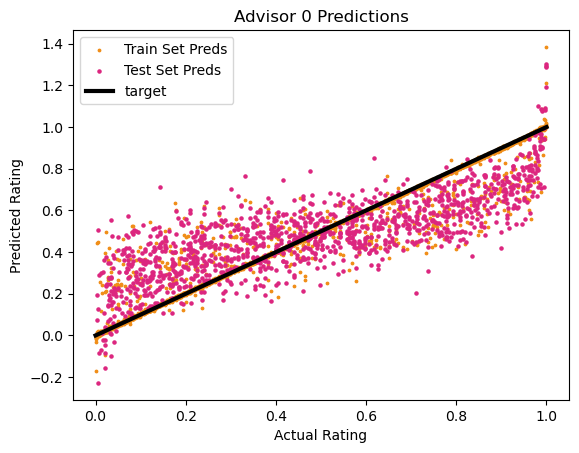

Train Set R2 score: 0.9450324190866147
Test Set R2 score: 0.6073270501944527


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_234830\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231112_234830\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.08 GB / 510.77 GB (5.1%)
Train Data Rows:    3748
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9995316910443931, 0.000898500117417629, 0.49556, 0.28834)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	A

[1000]	valid_set's rmse: 0.170269
[2000]	valid_set's rmse: 0.152111
[3000]	valid_set's rmse: 0.146275
[4000]	valid_set's rmse: 0.144647
[5000]	valid_set's rmse: 0.143991
[6000]	valid_set's rmse: 0.143703
[7000]	valid_set's rmse: 0.143576
[8000]	valid_set's rmse: 0.143598
[9000]	valid_set's rmse: 0.143628


	-0.1436	 = Validation score   (-root_mean_squared_error)
	32.35s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: RandomForest ...
	-0.2641	 = Validation score   (-root_mean_squared_error)
	4.35s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2644	 = Validation score   (-root_mean_squared_error)
	2.68s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		'<=' not supported between instances of 'float' and 'list'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_

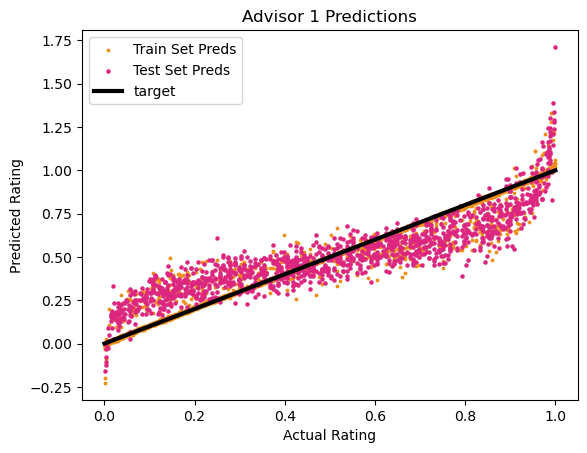

Train Set R2 score: 0.9664392189642175
Test Set R2 score: 0.774582964734774


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_235256\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231112_235256\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   25.91 GB / 510.77 GB (5.1%)
Train Data Rows:    3749
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.000642515014272003, 0.50178, 0.29128)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory

[1000]	valid_set's rmse: 0.255081
[2000]	valid_set's rmse: 0.251175
[3000]	valid_set's rmse: 0.248615
[4000]	valid_set's rmse: 0.247789


	-0.2476	 = Validation score   (-root_mean_squared_error)
	17.07s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: RandomForest ...
	-0.2746	 = Validation score   (-root_mean_squared_error)
	3.8s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2773	 = Validation score   (-root_mean_squared_error)
	2.71s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		'<=' not supported between instances of 'float' and 'list'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_v

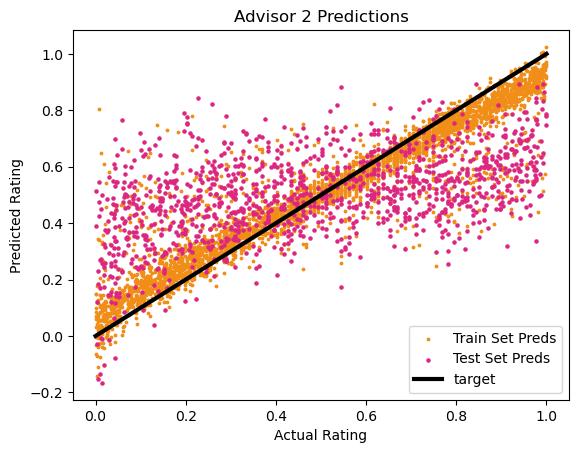

Train Set R2 score: 0.8736698461958492
Test Set R2 score: 0.24876035029312527


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_235447\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231112_235447\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   25.75 GB / 510.77 GB (5.0%)
Train Data Rows:    3750
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9993096973713276, 0.0009361947285035282, 0.50368, 0.28964)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	

[1000]	valid_set's rmse: 0.196859
[2000]	valid_set's rmse: 0.189621
[3000]	valid_set's rmse: 0.188261
[4000]	valid_set's rmse: 0.188033


	-0.1879	 = Validation score   (-root_mean_squared_error)
	16.05s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForest ...
	-0.2529	 = Validation score   (-root_mean_squared_error)
	3.94s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2542	 = Validation score   (-root_mean_squared_error)
	2.73s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		'<=' not supported between instances of 'float' and 'list'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_

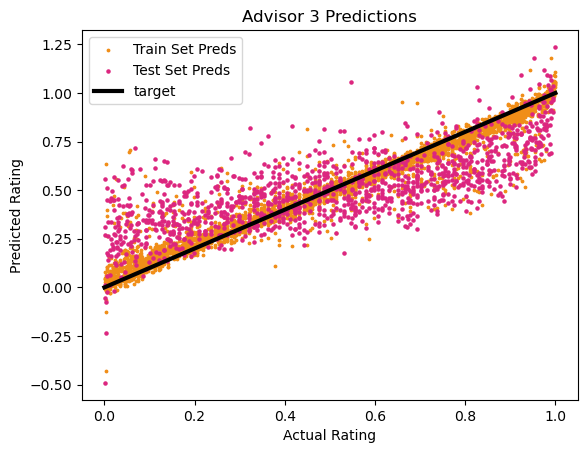

Train Set R2 score: 0.9292647153170748
Test Set R2 score: 0.5427812423517766


In [90]:
#run code for all advisors
all_predictions_619 = []
all_predictors_619 = []
for i in range(0,4):
    predictions, predictor = fit_plot_predict(grids, ratings, i)
    all_predictions_619.append(predictions)
    all_predictors_619.append(predictor)

In [ ]:
#determine what the 100 grid scores resulted in
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

In [ ]:
diversity_score(final_submission)


### Neural Net (Autogluon)

In [ ]:
def fit_plot_predict(grids, ratings, i):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    from autogluon.tabular import TabularPredictor

    from autogluon.common import space

    nn_options = {  # specifies non-default hyperparameter values for neural network models
        'num_epochs': 10,  # number of training epochs (controls training time of NN models)
        'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
        'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
        'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
    }

    gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
        'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
        'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
    }

    hyperparameters = {  # hyperparameters of each model type
                    'GBM': gbm_options,
                    'NN_TORCH': nn_options,  # : comment this line out if you get errors on Mac OSX
                    }  # When these keys are missing from hyperparameters dict, no models of that type are trained

    time_limit = 2*60  # train various models for ~2 min
    num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
    search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

    hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
        'num_trials': num_trials,
        'scheduler' : 'local',
        'searcher': search_strategy,
    }  # Refer to TabularPredictor.fit docstring for all valid values

    predictor = TabularPredictor(label='ratings').fit(
        all_train,
        time_limit=time_limit,
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    )
    # predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {
    #     'NN_TORCH': {
    #     'num_epochs': 50,
    #     'learning_rate': 0.01,
    #     'activation': 'relu',
    #     'layers': [100, 100],
    #     'dropout_prob': 0.1
    # }})

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

In [ ]:
#run code for all advisors
all_predictions = []
all_predictors = []
for i in range(0,4):
    predictions, predictor = fit_plot_predict(grids, ratings, i)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

In [ ]:
#determine what the 100 grid scores resulted in
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

In [ ]:
diversity_score(final_submission)

### Neural Net Try 2 (Autogluon)

In [87]:
def fit_plot_predict(grids, ratings, i):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    from autogluon.tabular import TabularPredictor

    from autogluon.common import space

    nn_options = {  # specifies non-default hyperparameter values for neural network models
        'num_epochs': 100,  # number of training epochs (controls training time of NN models)
        'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
        'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
        'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
    }

    gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
        'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
        'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
    }

    rf_options = {  # specifies non-default hyperparameter values for random forest
        'n_estimators': 100,  # number of trees in the forest
        'max_depth': space.Int(lower=1, upper=10, default=5),  # maximum depth of the trees
    }

    knn_options = {  # specifies non-default hyperparameter values for k-nearest neighbors
        'n_neighbors': space.Int(lower=1, upper=10, default=5),  # number of neighbors to use
    }

    cat_options = {  # specifies non-default hyperparameter values for CatBoost
        'iterations': 100,  # number of boosting iterations
        'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate
        'depth': space.Int(lower=1, upper=10, default=5),  # depth of the trees
}

    hyperparameters = {  # hyperparameters of each model type
                    'GBM': gbm_options,
                    'NN_TORCH': nn_options,
                    'RF': rf_options,
                    'KNN': knn_options,
                    'CAT': cat_options,
                    }  # When these keys are missing from hyperparameters dict, no models of that type are trained

    time_limit = 2*60  # train various models for ~2 min
    num_trials = 15  # try at most 5 different hyperparameter configurations for each type of model
    search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

    hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
        'num_trials': num_trials,
        'scheduler' : 'local',
        'searcher': search_strategy,
    }  # Refer to TabularPredictor.fit docstring for all valid values

    predictor = TabularPredictor(label='ratings').fit(
        all_train,
        time_limit=time_limit,
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    )

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

No path specified. Models will be saved in: "AutogluonModels\ag-20231112_233641\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20231112_233641\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.33 GB / 510.77 GB (5.2%)
Train Data Rows:    3749
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9998562098009612, 0.0008403151805306168, 0.48433, 0.29055)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFea

	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('object', []) : 49 | ['0', '1', '2', '3', '4', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []) : 49 | ['0', '1', '2', '3', '4', ...]
	0.9s = Fit runtime
	49 features in original data used to generate 49 features in processed data.
	Train Data (Processed) Memory Usage: 0.2 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.98s ...
AutoGluon will gauge predictive per

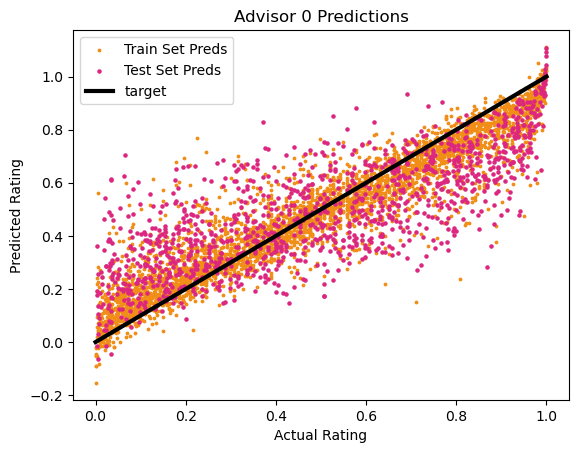

Train Set R2 score: 0.8747603120941985
Test Set R2 score: 0.6009478423101783


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_233746\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20231112_233746\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.31 GB / 510.77 GB (5.2%)
Train Data Rows:    3748
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9995316910443931, 0.000898500117417629, 0.50059, 0.28808)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeat

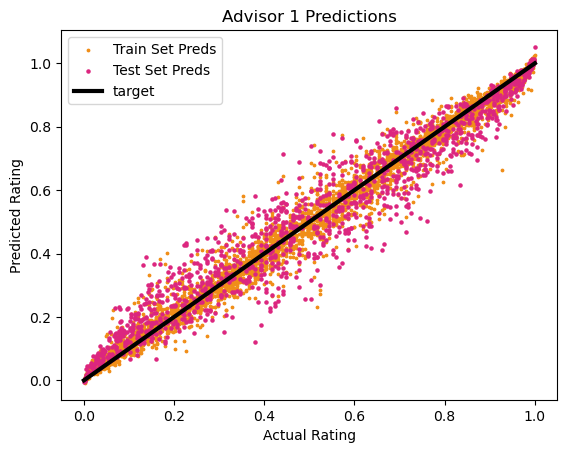

Train Set R2 score: 0.9787131913037541
Test Set R2 score: 0.9258787111042169


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_233850\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20231112_233850\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.28 GB / 510.77 GB (5.1%)
Train Data Rows:    3749
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9998998998999, 0.0006338748368184672, 0.49961, 0.29045)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatur

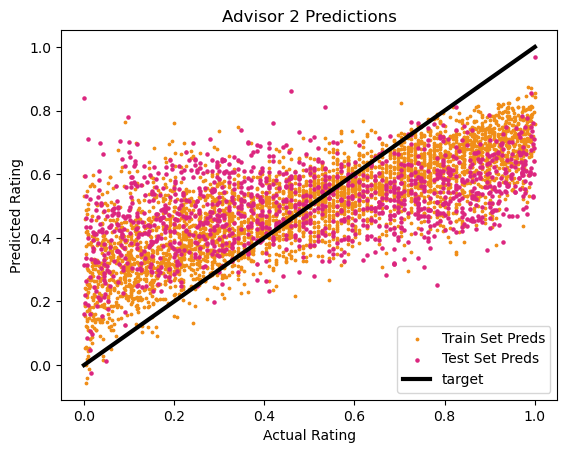

Train Set R2 score: 0.5675743200560492
Test Set R2 score: 0.22181282300253458


No path specified. Models will be saved in: "AutogluonModels\ag-20231112_233955\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20231112_233955\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   26.26 GB / 510.77 GB (5.1%)
Train Data Rows:    3750
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9993096973713276, 0.0009361947285035282, 0.50643, 0.29052)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFea

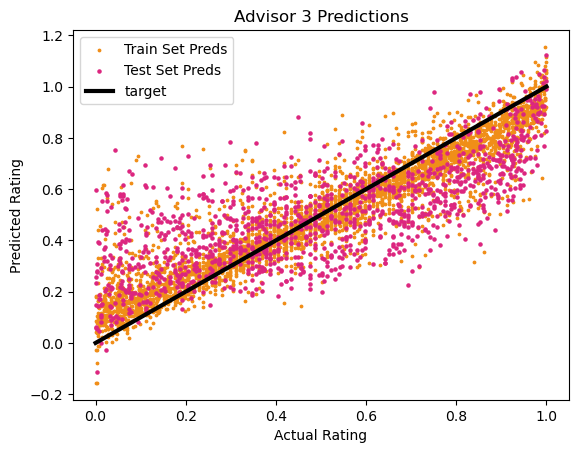

Train Set R2 score: 0.8588235869759859
Test Set R2 score: 0.5371213670528265


In [88]:
#run code for all advisors
all_predictions = []
all_predictors = []
for i in range(0,4):
    predictions, predictor = fit_plot_predict(grids, ratings, i)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

In [ ]:
#determine what the 100 grid scores resulted in
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

In [ ]:
diversity_score(final_submission)

## Run Old Autogluon Code (FINAL)

### Setup

In [1]:
from utils_public import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from sklearn.metrics import r2_score
import os

c:\Users\layal\anaconda3\envs\cp2env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_predictions(grids, ratings, predictor):
    grids = grids.reshape(grids.shape[0], 49)
    grids_df = pd.DataFrame(grids, columns = range(grids.shape[1]))
    predictions = predictor.predict(grids_df).values
    mask = np.where(~np.isnan(ratings)) # ~ is the bitwise NOT operator
    predictions[mask] = ratings[mask]
    return predictions

In [3]:
def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i):
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#F08E18") #Train set in orange
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #Test set in magenta
    plt.plot([0,1], [0,1], label="target", linewidth=3, c="k") # Target line in Black
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {i} Predictions")
    plt.legend()
    plt.show()
    print(f"Train Set R2 score: {r2_score(ratings_train, preds_train)}") #Calculate R2 score
    print(f"Test Set R2 score: {r2_score(ratings_test, preds_test)}")

In [6]:
grids = load_grids()
ratings = np.load("datasets/scores.npy") #Load advisor scores

In [5]:
def auto_run(predictor, grids_train, grids_test, ratings_train, ratings_test, i):
    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)

### Check All Autogluon

AutogluonModels/0/ag-20231107_023706/


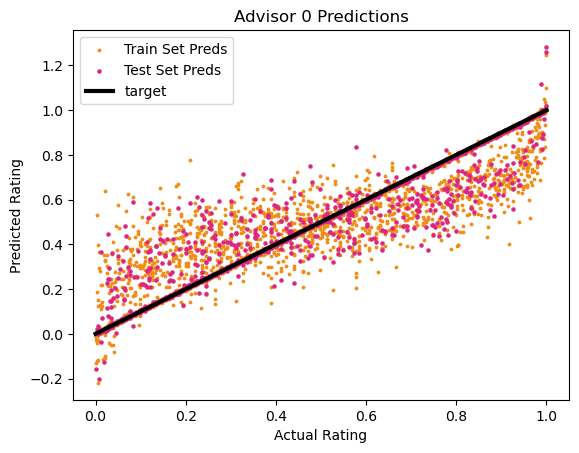

Train Set R2 score: 0.8653970454744263
Test Set R2 score: 0.8606133846653712
AutogluonModels/0/ag-20231107_171439/


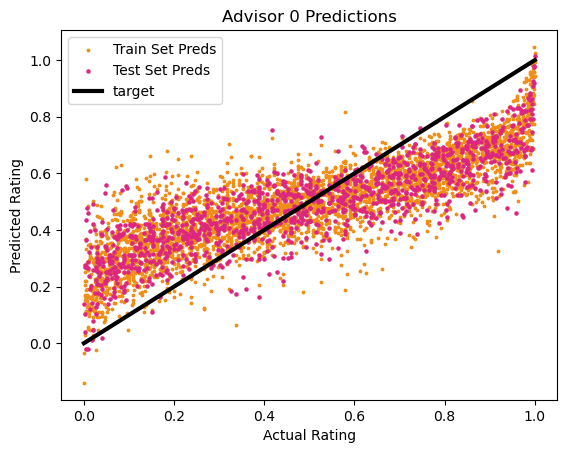

Train Set R2 score: 0.6213324753692359
Test Set R2 score: 0.6135714878300085
AutogluonModels/0/ag-20231107_172051/


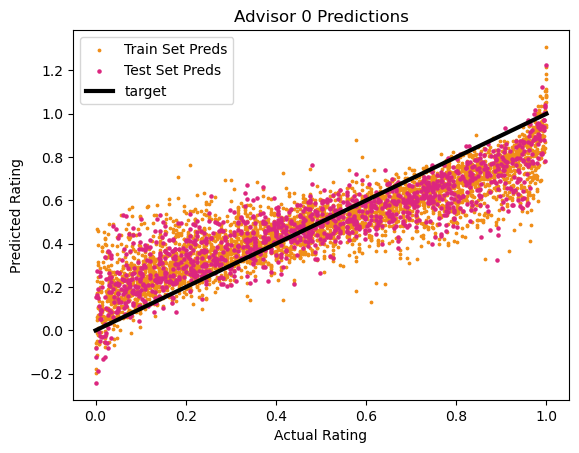

Train Set R2 score: 0.7502390485019443
Test Set R2 score: 0.7471627942424082
AutogluonModels/0/ag-20231112_152440/


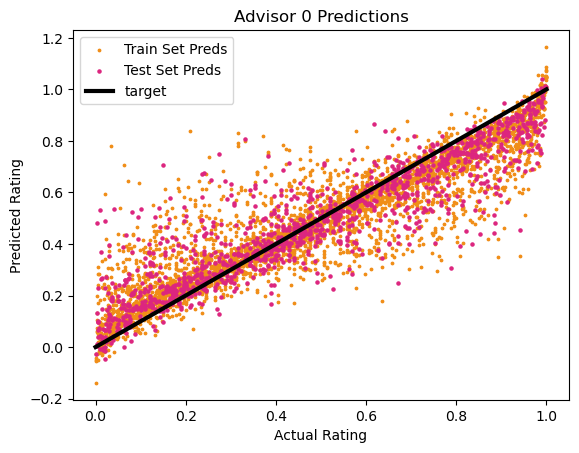

Train Set R2 score: 0.820423319620127
Test Set R2 score: 0.807704480783044
AutogluonModels/0/ag-20231112_152718/


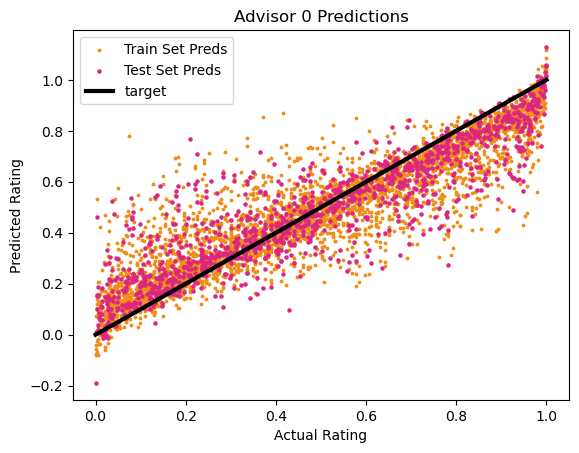

Train Set R2 score: 0.8186486591420373
Test Set R2 score: 0.8022347049088882
AutogluonModels/0/ag-20231112_153032/


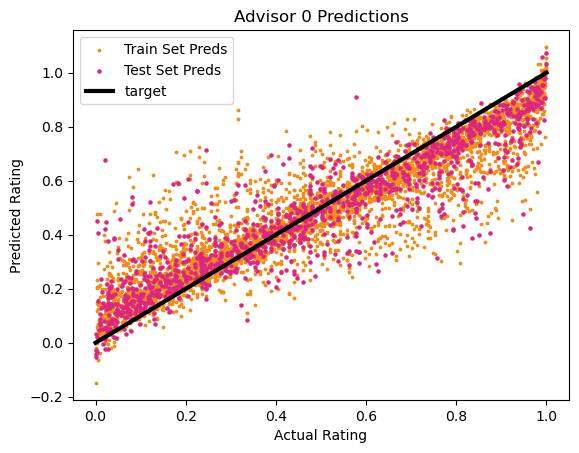

Train Set R2 score: 0.8186491993420777
Test Set R2 score: 0.8293187790108248
AutogluonModels/1/ag-20231107_011401/


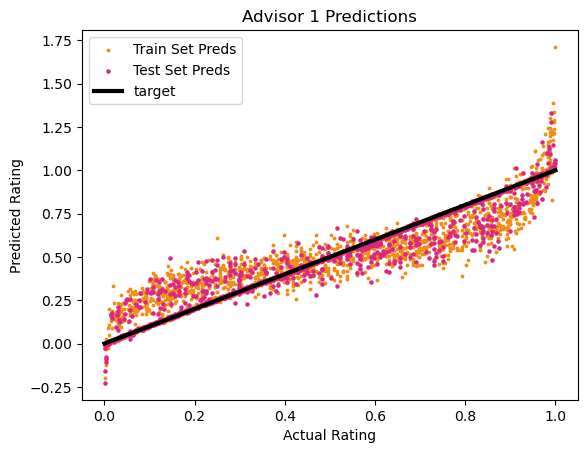

Train Set R2 score: 0.9180120116896731
Test Set R2 score: 0.9185540003401542
AutogluonModels/1/ag-20231107_171453/


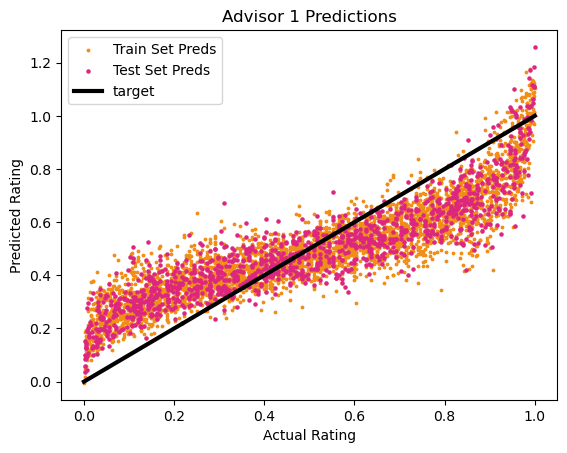

Train Set R2 score: 0.735132247982623
Test Set R2 score: 0.7410099040307214
AutogluonModels/1/ag-20231107_172111/


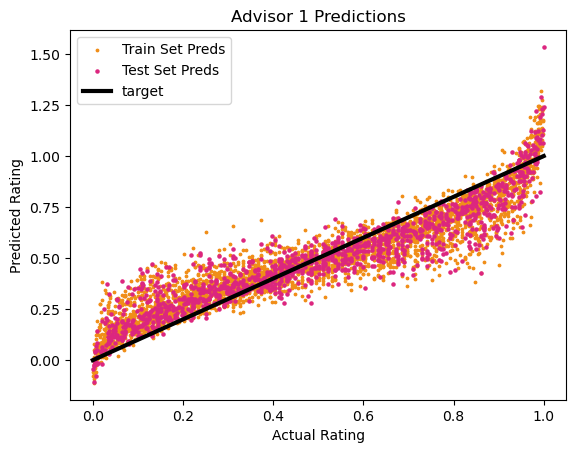

Train Set R2 score: 0.8513420122516682
Test Set R2 score: 0.8405672698610793
AutogluonModels/1/ag-20231112_153226/


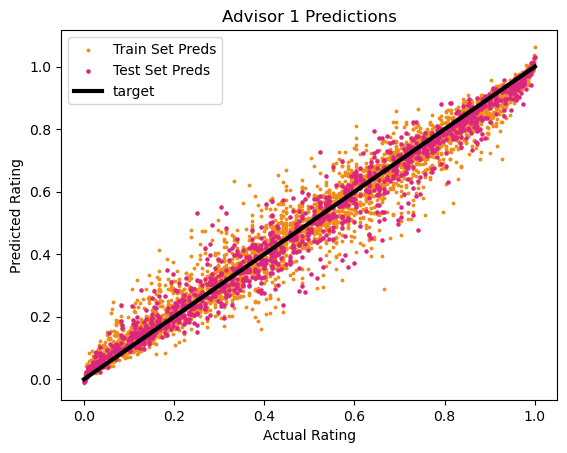

Train Set R2 score: 0.9615987391966295
Test Set R2 score: 0.9646218849448461
AutogluonModels/2/ag-20231107_011942/


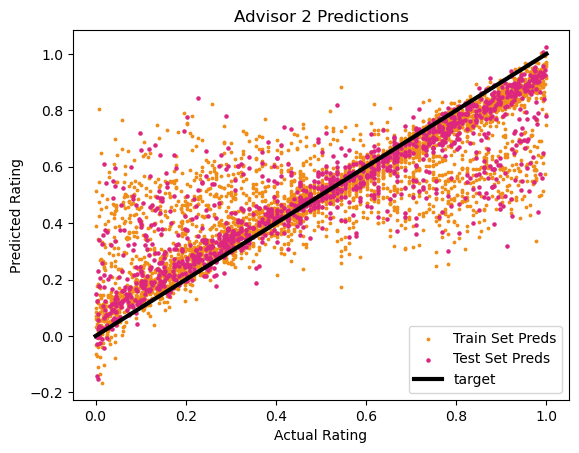

Train Set R2 score: 0.7102168060056222
Test Set R2 score: 0.7375434666296362
AutogluonModels/2/ag-20231107_171505/


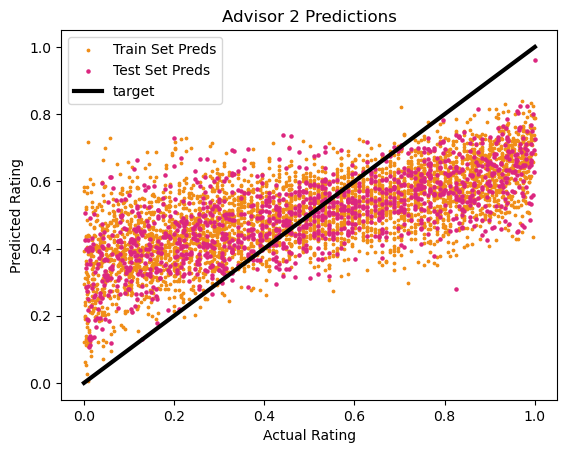

Train Set R2 score: 0.4094908613525233
Test Set R2 score: 0.4176284956333466
AutogluonModels/2/ag-20231107_172133/


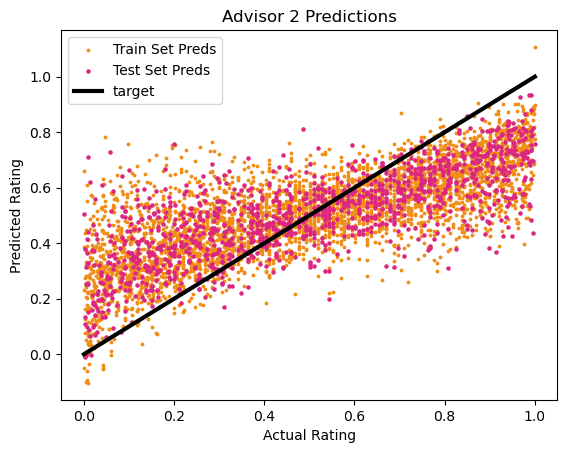

Train Set R2 score: 0.5264087890743985
Test Set R2 score: 0.5305550105777121
AutogluonModels/2/ag-20231112_155330/


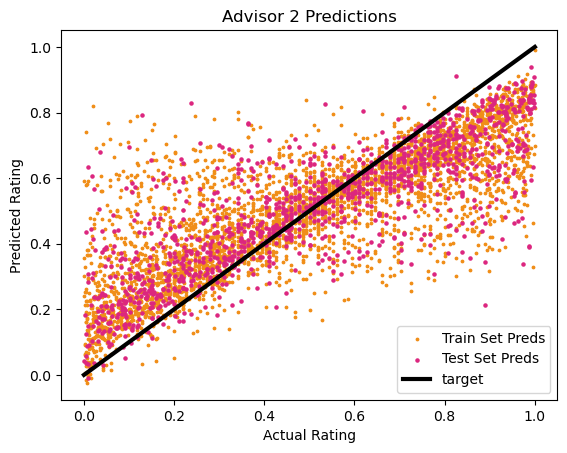

Train Set R2 score: 0.6160078851925141
Test Set R2 score: 0.6377904635506253
AutogluonModels/3/ag-20231107_012140/


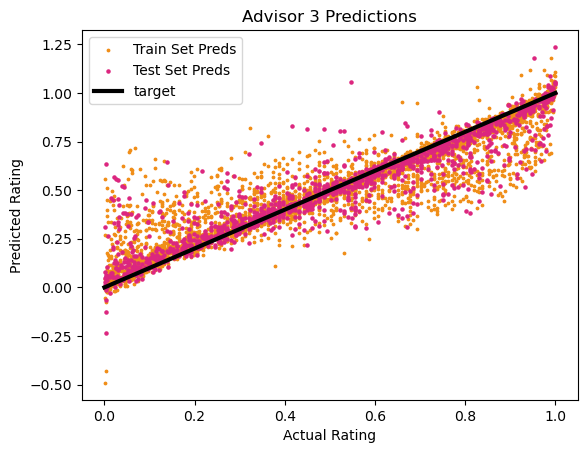

Train Set R2 score: 0.8318676084508427
Test Set R2 score: 0.8365653418029096
AutogluonModels/3/ag-20231107_171520/


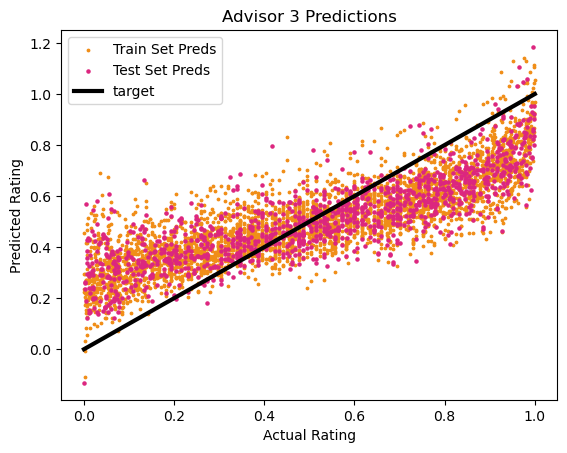

Train Set R2 score: 0.6256609986050446
Test Set R2 score: 0.6160396699560586
AutogluonModels/3/ag-20231107_172156/


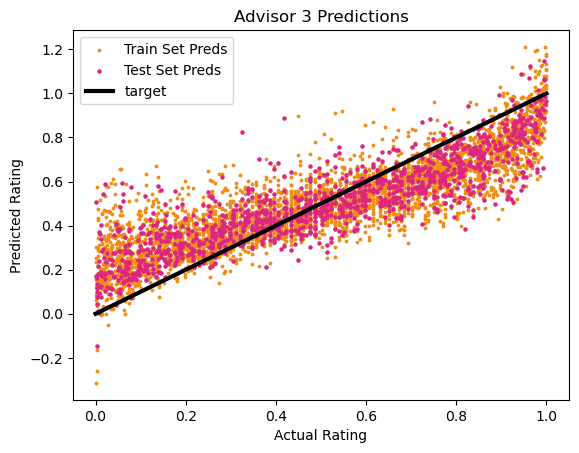

Train Set R2 score: 0.7176700811828257
Test Set R2 score: 0.7239878331272066
AutogluonModels/3/ag-20231112_155531/


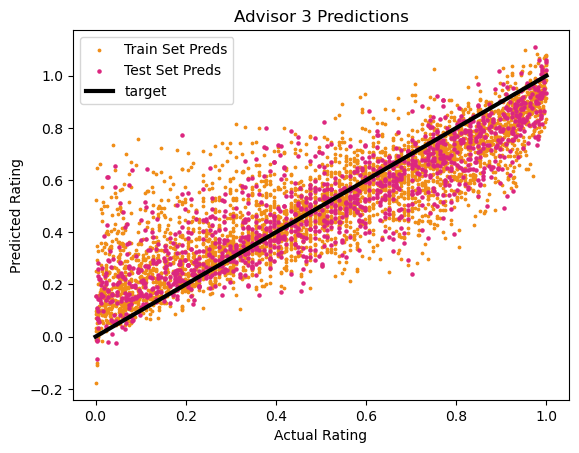

Train Set R2 score: 0.7419404106905352
Test Set R2 score: 0.764479007436863


In [23]:
cwd = os.getcwd()
for i in range(4):
    f = os.path.join(cwd, 'AutogluonModels', '%d'%i)
    files = os.listdir(f)
    for j in files:
        direc="AutogluonModels/%d/%s/"%(i,j)
        print(direc)
        predictor = TabularPredictor.load(direc) #load the predictor
        # all_predictions = []
        grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
        grids_subset = grids_subset.reshape(grids_subset.shape[0], 49) #flatten the grids
        grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
        grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
        grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
        auto_run(predictor, grids_train, grids_test, ratings_train, ratings_test, i)
        # predictions = get_predictions(grids, ratings[:,i], predictor)
        # all_predictions.append(predictions)

### Best Autogluon (FINAL)

In [9]:
cwd=os.getcwd()
f = os.path.join(cwd, 'AutogluonModels', 'best')
files = os.listdir(f)
print(files)

['0ag-20231107_023706', '1ag-20231112_153226', '2ag-20231107_011942', '3ag-20231107_012140']


AutogluonModels/best/0ag-20231107_023706


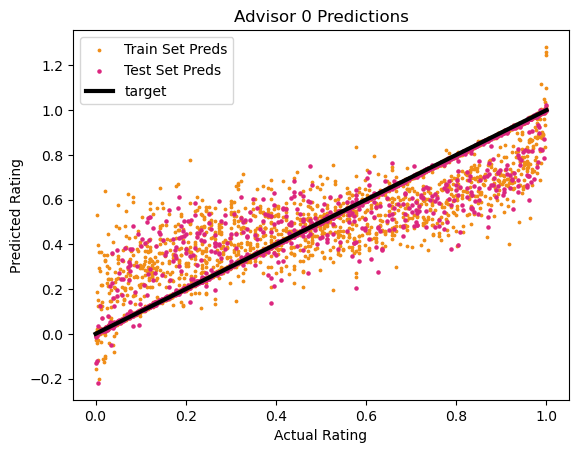

Train Set R2 score: 0.8652299740206717
Test Set R2 score: 0.8613713310690722
AutogluonModels/best/1ag-20231112_153226


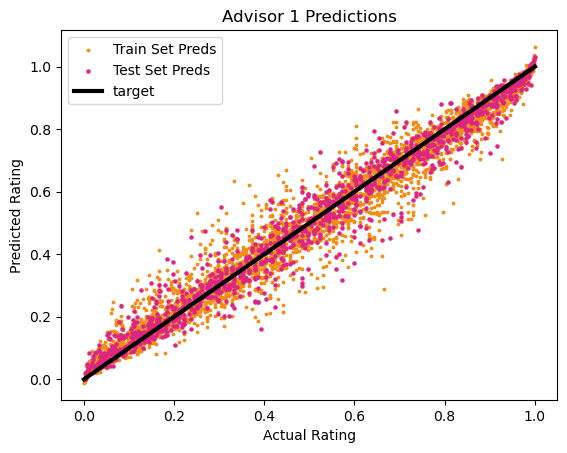

Train Set R2 score: 0.962542757877789
Test Set R2 score: 0.9618828419234787
AutogluonModels/best/2ag-20231107_011942


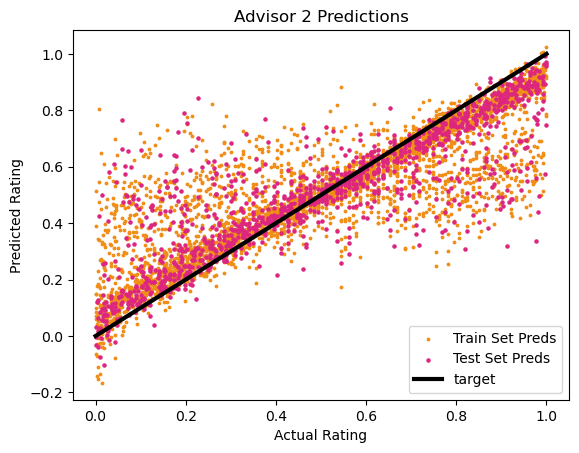

Train Set R2 score: 0.7207145299433397
Test Set R2 score: 0.7069407517432249
AutogluonModels/best/3ag-20231107_012140


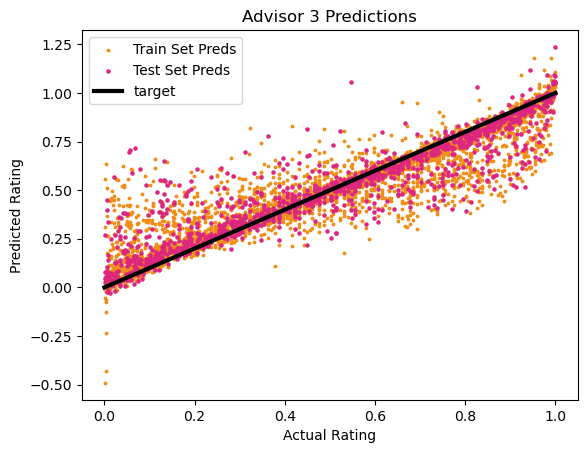

Train Set R2 score: 0.8365472034219849
Test Set R2 score: 0.8228073242255399


In [10]:
all_predictions = []
for i in range(4):
    j=files[i]
    direc="AutogluonModels/best/%s"%j
    print(direc)
    predictor = TabularPredictor.load(direc) #load the predictor
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49) #flatten the grids
    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    auto_run(predictor, grids_train, grids_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    all_predictions.append(predictions)

In [69]:
#determine what the 100 grid scores resulted in
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

Number of valid grids (as predicted): 0
best predicted scores: [0.8073551  0.7908684  0.98004997 0.963675  ]


## Neural Nets (Pytorch)

In [ ]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
import transformers
from transformers import AutoConfig
from torch.utils.data import DataLoader, TensorDataset
import sklearn
grids=load_grids()
ratings=np.load("datasets/scores.npy")


In [ ]:
grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)

In [ ]:
def nn_torch_old(grids, ratings, adv):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,adv]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)
    # gridy=grids_subset.reshape(-1, 7, 7)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)

    # Split into features and labels
    X_train = grids_train  # all columns except the last one
    y_train = ratings_train  # the last column

    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float)

    # Create a TensorDataset from the tensors
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # Create a DataLoader from the TensorDataset
    trainloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

    # Define the network architecture
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(49, 25)  # 49 input features, 25 output features
            self.fc2 = nn.Linear(25, 13)  
            self.fc3 = nn.Linear(13, 1) 
            self.activation = nn.Sigmoid()
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.fc3(x)
            x = self.activation(x)
            return x

    # Create the network, loss function and optimizer
    net = Net() # Create the network
    net.train() # Set the network to training mode
    criterion = nn.MSELoss()  # For regression tasks
    optimizer = optim.AdamW(net.parameters(), lr=0.1)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, 
                                                     min_lr=1e-10,
                                                     verbose=True) # Reduce learning rate when a metric has stopped improving
    
    
    # Train the network
    for epoch in range(10):  # Loop over the dataset multiple times
        running_loss = 0.0 # Keep track of the loss
        print(running_loss)
        for i, data in enumerate(trainloader, 0):  # Replace trainloader with your actual data loader
            inputs, labels = data # Get the inputs from the data loader
            optimizer.zero_grad() 
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            scheduler.step(loss)
            running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')
    
    # Assuming grids_test and ratings_test are your test data
    X_test = grids_test
    y_test = ratings_test

    # Convert numpy arrays to PyTorch tensors
    X_test_tensor = torch.tensor(X_test, dtype=torch.float)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float)

    # Create a TensorDataset from the tensors
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Create a DataLoader from the TensorDataset
    testloader = DataLoader(test_dataset, batch_size=1000)

    # Run the network on the test data and store the predictions
    # preds_test = []
    net.eval()
    preds_test = np.array(net(X_test_tensor).detach().numpy())
    preds_train = np.array(net(X_train_tensor).detach().numpy())

    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, adv)
        
    print('Finished Training')
    return preds_test, net #predictions for the test set

In [ ]:
all_predictions = []
all_predictors = []
for adv in range(4):
    predictions, predictor = nn_torch_old(grids, ratings, adv)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

### Unchanged NN Code (No Grid Train)

In [ ]:
def nn_torch_un(grids, ratings, adv):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,adv]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    # grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    # grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    # preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    # all_train = pd.concat([grids_train, preds_train], axis=1)
    
    # Convert DataFrame to numpy array
    # numpy_array = all_train.values

    # Split into features and labels
    X_train = grids_train  # all columns except the last one
    y_train = ratings_train  # the last column

    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float)

    # Create a TensorDataset from the tensors
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # Create a DataLoader from the TensorDataset
    trainloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

    # Define the network architecture
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(49, 25)  # Replace 16 with the number of input features
            self.fc2 = nn.Linear(25, 1)  # Replace 1 with the number of output features
            self.activation = nn.Sigmoid()
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = self.fc2(x)
            x = self.activation(x)
            return x

    # Create the network, loss function and optimizer
    net = Net()
    net.train()
    criterion = nn.MSELoss()  # For regression tasks
    # optimizer = optim.SGD(net.parameters(), lr=0.001)
    optimizer = optim.Adam(net.parameters(), lr=1e-3)
    # Train the network
    for epoch in range(10):  # Loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):  # Replace trainloader with your actual data loader
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            # print(outputs)
            loss = criterion(outputs.view(-1), labels.view(-1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')
    # preds_train=[]
    # preds_train.extend(outputs.detach().numpy())
    # preds_train = np.array(preds_train)
    preds_train = np.array(outputs.detach().numpy())
    # Assuming grids_test and ratings_test are your test data
    X_test = grids_test
    y_test = ratings_test

    # Convert numpy arrays to PyTorch tensors
    X_test_tensor = torch.tensor(X_test, dtype=torch.float)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float)

    # Create a TensorDataset from the tensors
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Create a DataLoader from the TensorDataset
    testloader = DataLoader(test_dataset, batch_size=1000)

    # Run the network on the test data and store the predictions
    preds_test = []
    net.eval()
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        preds_test.extend(outputs.detach().numpy())

    # Convert list to numpy array
    preds_test = np.array(preds_test)

    # Run the network on the train data and store the predictions
    preds_train = []
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        preds_train.extend(outputs.detach().numpy())

    # Convert list to numpy array
    preds_train = np.array(preds_train)

    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, adv)
        
    print('Finished Training')
    return preds_test, net #predictions for the test set

### CNN Attempt

In [ ]:
i=0
grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)
gridy=grids_subset.reshape(-1, 7, 7)

grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)

# Split into training data
X_train = grids_train.reshape(-1, 7, 7)  # all columns except the last one
y_train = ratings_train  # the last column

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)

# Create a TensorDataset from the tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# # Create a DataLoader from the TensorDataset
# trainloader = DataLoader(train_dataset, batch_size=10, shuffle=True)


In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Define your CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 2)
        self.fc1 = nn.Linear(16 * 1 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# # Convert numpy arrays to PyTorch tensors
# X_train = torch.tensor(gridy, dtype=torch.float).unsqueeze(1)  # Add an extra dimension for the color channel
# y_train = torch.tensor(ratings_subset, dtype=torch.float)

# # Create a TensorDataset from the tensors
# train_dataset = TensorDataset(X_train, y_train)

# Create a DataLoader from the TensorDataset
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define a loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Reshape labels to match output shape
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

print('Finished Training')

## Grid Search (Final All Code)

#### Imports and Fxns

In [ ]:
from utils_public import *
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetRegressor
import torch
import torch.nn as nn
import torch.optim as optim
import transformers
from transformers import AutoConfig
from torch.utils.data import DataLoader, TensorDataset
grids = load_grids()
ratings = np.load("datasets/scores.npy") #Load advisor scores

In [ ]:
from sklearn.metrics import r2_score

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i):
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#F08E18") #Train set in orange
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #Test set in magenta
    plt.plot([0,1], [0,1], label="target", linewidth=3, c="k") # Target line in Black
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {i} Predictions")
    plt.legend()
    plt.show()
    print(f"Train Set R2 score: {r2_score(ratings_train, preds_train)}") #Calculate R2 score
    print(f"Test Set R2 score: {r2_score(ratings_test, preds_test)}")

#### Finding Optimal Hyperparamaters for Each Advisor Neural Net

In [ ]:
advisor_params = []
# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(49, 25)  # 49 input features, 25 output features
        self.fc2 = nn.Linear(25, 13)  #25 in, 13 out
        self.fc3 = nn.Linear(13, 1)   #13 in, 1 out
        self.activation = nn.Sigmoid() #sigmoid activation function
    def forward(self, x): #forward pass
        x = torch.relu(self.fc1(x)) #relu activation function
        x = torch.relu(self.fc2(x)) #relu activation function
        x = self.fc3(x) #no activation function on the last layer
        x = self.activation(x)
        return x
    
#define hyperparameter grid
param_grid={
    'batch_size': [10, 50, 100, 500, 1000, 1500],
    'max_epochs': [100, 200, 300],
    } 

# Create the network, loss function and optimizer
net = Net() # Create the network
criterion = nn.MSELoss()  # For regression tasks 
optimizer = optim.AdamW(net.parameters(), lr=0.1) #AdamW optimizer
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, 
                                                min_lr=1e-10,
                                                verbose=True) # Reduce learning rate when a metric has stopped improving

# create model with skorch
model = NeuralNetRegressor(
    Net,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam,
    verbose=False,
    train_split=None
) 

for i in range(4):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor i
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)
    
    # Convert numpy arrays to PyTorch tensors
    X_tensor = torch.tensor(grids_subset, dtype=torch.float32)
    y_tensor = torch.tensor(ratings_subset, dtype=torch.float32).reshape(-1,1)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
    advisor_params.append(grid.fit(X_tensor, y_tensor))

In [ ]:
# summarize results
for i in range(4):
    print("Best: %f using %s" % (advisor_params[i].best_score_, advisor_params[i].best_params_))
    # means = advisor_params[i].cv_results_['mean_test_score']
    # stds = advisor_params[i].cv_results_['std_test_score']
    # params = advisor_params[i].cv_results_['params']
    # for mean, stdev, param in zip(means, stds, params):
    #     print("%f (%f) with: %r" % (mean, stdev, param))

#### Advisor Model Training and Validation

In [ ]:
grids=load_grids()
ratings=np.load("datasets/scores.npy")
#first entry batch size, second entry max epochs
params={0: [50, 200], 
        1: [50, 100], 
        2: [10, 300], 
        3: [10, 300]}

In [ ]:
def get_advisor_data(grids, ratings, num, batch_size):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,num]) #gets subset of the dataset rated by advisor i
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)
    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(grids_train, dtype=torch.float)
    y_train_tensor = torch.tensor(ratings_train, dtype=torch.float)

    # Create a TensorDataset from the tensors
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

    # Create a DataLoader from the TensorDataset
    trainloader = DataLoader(train_dataset, batch_size, shuffle=True)

    # Convert numpy arrays to PyTorch tensors
    X_test_tensor = torch.tensor(grids_test, dtype=torch.float)
    y_test_tensor = torch.tensor(ratings_test, dtype=torch.float)

    # Create a TensorDataset from the tensors
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Create a DataLoader from the TensorDataset
    testloader = DataLoader(test_dataset, batch_size, shuffle=True)
    
    return X_train_tensor, X_test_tensor, ratings_train, ratings_test, trainloader, testloader

In [ ]:
def nn_torch(X_train, X_test, ratings_train, ratings_test, trainloader, testloader, adv, max_epochs):
    # Define the network architecture
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(49, 25)  # 49 input features, 25 output features
            self.fc2 = nn.Linear(25, 13)  #25 in, 13 out
            self.fc3 = nn.Linear(13, 1)   #13 in, 1 out
            self.activation = nn.Sigmoid() #sigmoid activation function
        def forward(self, x): #forward pass
            x = torch.relu(self.fc1(x)) #relu activation function
            x = torch.relu(self.fc2(x)) #relu activation function
            x = self.fc3(x) #no activation function on the last layer
            x = self.activation(x)
            return x
        
    # Create the network, loss function and optimizer
    net = Net() # Create the network   
    criterion = nn.MSELoss()  # For regression tasks 
    optimizer = optim.AdamW(net.parameters(), lr=0.1) #AdamW optimizer
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, 
                                                min_lr=1e-10,
                                                verbose=True) # Reduce learning rate when a metric has stopped improving

    # Train the network
    net.train() # Set the network to training mode
    for epoch in range(max_epochs):  # Loop over the dataset multiple times
        running_loss = 0.0 # Keep track of the loss
        for i, data in enumerate(trainloader, 0):  
            inputs, labels = data # Get the inputs from the data loader
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            scheduler.step(loss)
            running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

    # Run the network on the test data and store the predictions
    net.eval()
    preds_train = np.array(net(X_train).detach().numpy())
    preds_test = np.array(net(X_test).detach().numpy())

    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, adv)
        
    print('Finished Training')
    return preds_test, net #predictions for the test set

In [ ]:
def get_predictions_nn(grids, ratings, net):
    grids = grids.reshape(grids.shape[0], 49)
    X_test_tensor = torch.tensor(grids, dtype=torch.float)
    predictions = net(X_test_tensor).detach().numpy().flatten()
    mask = np.where(~np.isnan(ratings))
    predictions[mask] = ratings[mask]
    return predictions.reshape(-1,1)

C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 00026: reducing learning rate of group 0 to 1.0000e-02.
Epoch 00047: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00058: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00069: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00095: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00106: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00117: reducing learning rate of group 0 to 1.0000e-08.
Epoch 200, loss: 0.09483746046821276


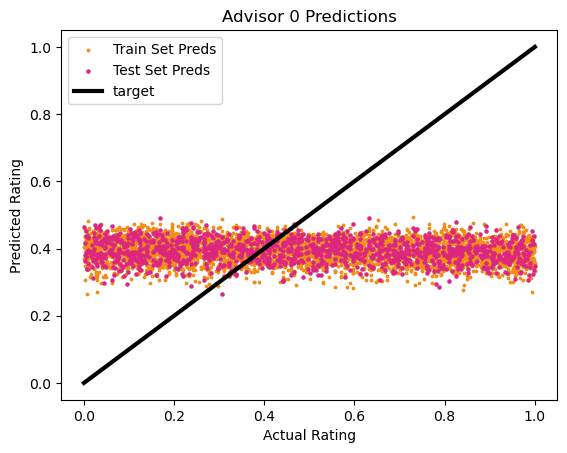

Train Set R2 score: -0.1422137874449989
Test Set R2 score: -0.14071060938062585
Finished Training
Epoch 00019: reducing learning rate of group 0 to 1.0000e-02.
Epoch 00044: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00055: reducing learning rate of group 0 to 1.0000e-04.


C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 00066: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00077: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00088: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00099: reducing learning rate of group 0 to 1.0000e-08.
Epoch 100, loss: 0.0840313675502936


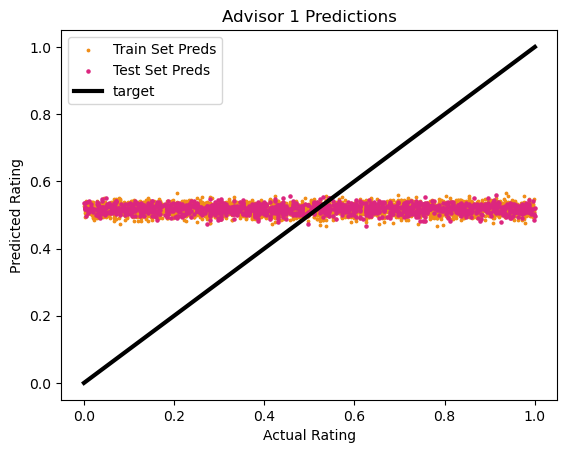

Train Set R2 score: -0.007782393882202587
Test Set R2 score: -0.0035581442724192947
Finished Training
Epoch 00017: reducing learning rate of group 0 to 1.0000e-02.
Epoch 00028: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00039: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00060: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00071: reducing learning rate of group 0 to 1.0000e-06.


C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 00082: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00093: reducing learning rate of group 0 to 1.0000e-08.


C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 300, loss: 0.09158666504422823


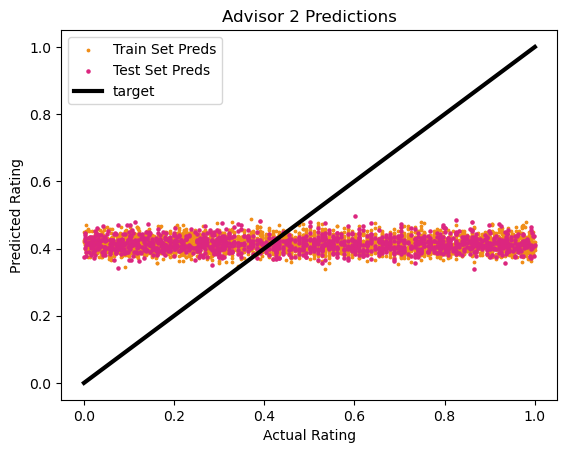

Train Set R2 score: -0.09225759145619539
Test Set R2 score: -0.07949250624112647
Finished Training
Epoch 00014: reducing learning rate of group 0 to 1.0000e-02.
Epoch 00027: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00038: reducing learning rate of group 0 to 1.0000e-04.


C:\Users\layal\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 00055: reducing learning rate of group 0 to 1.0000e-05.
Epoch 00074: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00094: reducing learning rate of group 0 to 1.0000e-07.
Epoch 00105: reducing learning rate of group 0 to 1.0000e-08.
Epoch 300, loss: 0.08434505475560825


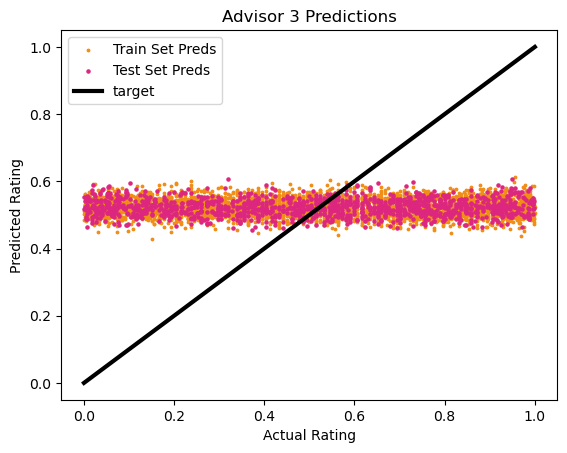

Train Set R2 score: -0.013383858597580067
Test Set R2 score: -0.009979011685559591
Finished Training


In [ ]:
#run code for all advisors
all_predictions = []
all_predictors = []
for adv in range(4):
    batch_size = params[adv][0]
    max_epochs = params[adv][1]
    X_train, X_test, ratings_train, ratings_test, trainloader, testloader = get_advisor_data(grids, ratings, adv, batch_size)
    predictions, net = nn_torch(X_train, X_test, ratings_train, ratings_test, trainloader, testloader, adv, max_epochs)
    predictions = get_predictions_nn(grids, ratings[:,adv], net)
    all_predictions.append(predictions)
    all_predictors.append(net)

## Preparing a submission
Let's prepare a submission. We expect the final submission to be a 100x7x7 numpy array of integers between 0 and 4, inclusive. Note: we do NOT need your predicted scores. We will ask the advisors to score your submissions directly!
You can verify that your submission is formatted properly with the following asserts:

In [ ]:
#determine what the 100 grid scores resulted in
final_prediction_array = np.stack(all_predictions).T[0]
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

In [18]:
final_submission = grids[top_100_indices].astype(int)

In [ ]:
diversity_score(final_submission)

0.5456565656565656

In [20]:
assert final_submission.shape == (100, 7, 7)
assert final_submission.dtype == int
assert np.all(np.greater_equal(final_submission, 0) & np.less_equal(final_submission, 4))

We need each submission to have a unique submission ID for scoring. Generate a random ID and save the file using that ID:

In [21]:
id = np.random.randint(1e8, 1e9-1)
np.save(f"{id}.npy", final_submission)